In [37]:
from datetime import *
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [38]:
df_communal = pd.read_csv('communal_service.csv')
df_employee = pd.read_csv('employee.csv')
df_report1 = pd.read_csv('report1.csv')
df_report2 = pd.read_csv('report2.csv')

In [39]:
df_all_reports = pd.concat([df_report1,df_report2], ignore_index=True)

In [40]:
tariff = {
    'tariff_num' : [1, 2, 3, 4],
    'payment_p_h' : [23, 21, 22, 21],
}
df_tariff = pd.DataFrame(tariff)

In [41]:
df_merged = df_all_reports.merge(df_communal, how='right')
df_merged = df_merged.merge(df_employee, how='right')
df_merged = df_merged.merge(df_tariff, how='right')

In [46]:
df_merged.fillna(0, inplace=True)

,date,com_id,em_id,hours,litters,com_name,last_name,tariff_num,payment_p_h,general_sum
0,2022/08/11,1,1,8,1.0,Міжнародний аеропорт «Харків»,Savka,1,23,184
1,2022/11/26,1,1,1,7.0,Міжнародний аеропорт «Харків»,Savka,1,23,23
2,2022/02/25,1,2,10,0.0,Міжнародний аеропорт «Харків»,Salo,2,21,210
3,2022/03/23,1,2,2,0.0,Міжнародний аеропорт «Харків»,Salo,2,21,42
4,2022/09/12,2,2,9,0.0,Київпастранс,Salo,2,21,189
5,2022/06/15,2,2,2,2.0,Київпастранс,Salo,2,21,42
6,2022/5/28,2,2,3,9.0,Київпастранс,Salo,2,21,63
7,2022/05/10,3,3,7,0.0,ОСК «Металіст»,Gorbal,3,22,154
8,2022/04/18,3,3,2,4.0,ОСК «Металіст»,Gorbal,3,22,44
9,2022/01/12,4,4,9,0.0,КП «Криворіжкнига»,Petrishin,4,21,189


In [43]:
df_merged['general_sum'] = df_merged['hours']*df_merged['payment_p_h']
print('General payment for all employee: ', df_merged['general_sum'].sum())

General payment for all employee:  1350


In [44]:
with_spec_tech = df_merged['litters'] != 0 
without_spec_tech = df_merged['litters'] == 0 

In [45]:
df_by_date1 = df_merged[with_spec_tech].groupby('date').sum()
df_by_date1['general_sum']

date
2022/04/18     44
2022/06/15     42
2022/08/11    184
2022/11/26     23
2022/12/22     42
2022/5/28      63
Name: general_sum, dtype: int64

<AxesSubplot:xlabel='payment for workers who used spec. tech'>

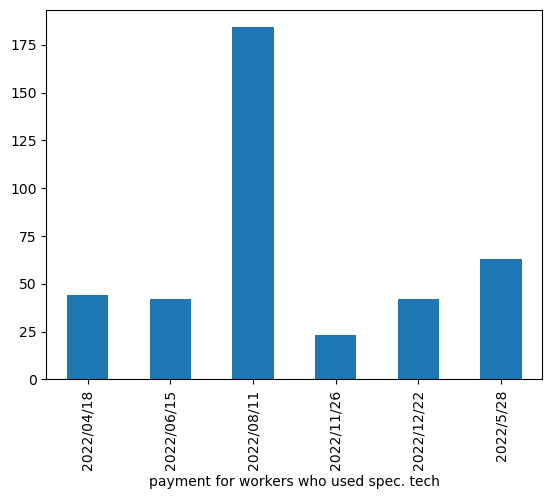

In [36]:
df_by_date1['general_sum'].plot(kind = 'bar', xlabel='payment for workers who used spec. tech')

In [32]:
df_by_date2 = df_merged[without_spec_tech].groupby('date').sum()
df_by_date2['general_sum']

date
2022/01/12    189
2022/02/25    210
2022/03/23     42
2022/05/10    154
2022/09/12    189
2022/12/11    168
Name: general_sum, dtype: int64

<AxesSubplot:xlabel='payment for workers who didnt use spec. tech'>

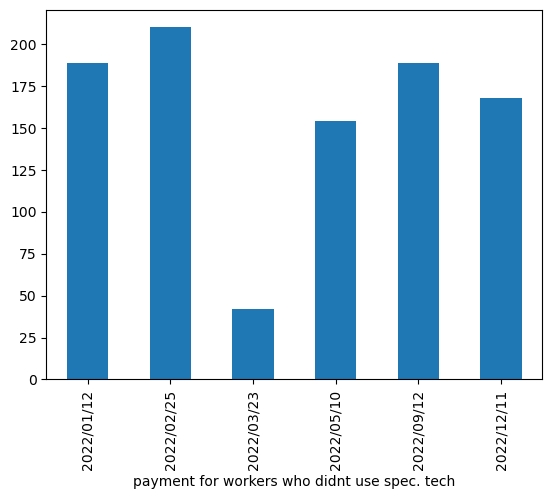

In [33]:
df_by_date2['general_sum'].plot(kind = 'bar', xlabel='payment for workers who didnt use spec. tech')

In [54]:
df_new = df_merged.groupby(['last_name']).sum()
# def paid_sum(last):
#     df_new = df_merged.groupby(['last_name']).sum()
#     df_new = df_new.loc[last, 'general_sum']
#     display(df_new)
#     df_new.plot(kind = 'bar', xlabel=f'general payment for: {last}')

,com_id,em_id,hours,litters,tariff_num,payment_p_h,general_sum
last_name,,,,,,,
Gorbal,6,6,9,4.0,6,44,198
Petrishin,12,12,19,3.0,12,63,399
Salo,8,10,26,11.0,10,105,546
Savka,2,2,9,8.0,2,46,207


In [52]:
widgets.interact(paid_sum, last=['Savka', 'Salo', 'Gorbal', 'Petrishin'])

interactive(children=(Dropdown(description='last', options=('Savka', 'Salo', 'Gorbal', 'Petrishin'), value='Sa…

<function __main__.paid_sum(last)>